# 파일 핸들링 & OS 기본 명령어

### Text 파일 생성


In [2]:
def write_txt(filepath):
    # 텍스트 파일에 한 줄식 쓰기(writeline)
    count = 1
    data = []
    print('파일에 내용을 저장하려면 내용을 입력하지 말고 [Enter]를 누르세요')
    
    while True:
        text = input('[%d] 파일에 저장할 내용을 입력하세요' %count)
        if text == '':
            break
        data.append(text + '\n')
        count += 1
        
    f = open(filepath, 'w')
    f.writelines(data)
    f.close()
    
    ret = 'TEXT 파일을 생성하였습니다'
    
    return ret

In [4]:
filepath = './data/mydata.txt'
write_txt(filepath)

파일에 내용을 저장하려면 내용을 입력하지 말고 [Enter]를 누르세요
[1] 파일에 저장할 내용을 입력하세요안녕하세요!
[2] 파일에 저장할 내용을 입력하세요빨리 끝내고
[3] 파일에 저장할 내용을 입력하세요집에 갑시다
[4] 파일에 저장할 내용을 입력하세요화이팅!
[5] 파일에 저장할 내용을 입력하세요


'TEXT 파일을 생성하였습니다'

In [5]:
f = open(filepath, 'r')
data = f.read()
f.close()

print(data)

안녕하세요!
빨리 끝내고
집에 갑시다
화이팅!



- Text 파일 복사

In [8]:
# 텍스트 파일 복사하기(read, write)
f = open('./data/mydata.txt','r')
h = open('./data/mydata_copy.txt','w')

data = f.read()
h.write(data)

h.close()
f.close()

In [17]:
with open('./data/mydata_copy.txt','r') as fp:
    data = fp.read()
    print(data)

안녕하세요!
빨리 끝내고
집에 갑시다
화이팅!



- Image 파일 복사

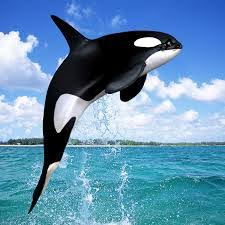

In [19]:
from IPython.display import Image

origin_img = './whale.jpg'
copied_img ='./whale_copy.jpg'

Image(origin_img)

In [20]:
# 바이너리 파일 복사하기(read, write)

bufsize = 1024
f = open(origin_img, 'rb')
h = open(copied_img, 'wb')

data = f.read(bufsize)
while data:
    h.write(data)
    data=f.read(bufsize)
    
h.close()
f.close()

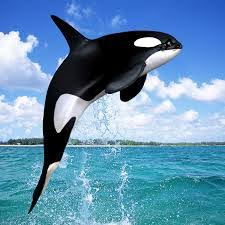

In [21]:
Image(copied_img)

## OS 기본 명령어

### 파일 크기 구하기(ospathgetsize)

In [24]:
# 파일 크기 구하기(ospathgetsize)
from os.path import getsize

file1 = './data/mydata_copy.txt'
file2 = './whale_copy.jpg'

file_size1 = getsize(file1)
file_size2 = getsize(file2)

print(file1, file_size1)
print(file2, file_size2)



./data/mydata_copy.txt 48
./whale_copy.jpg 11016


- 파일 삭제하기(osremove)

In [25]:
from os import remove

target_file = './data/mydata_copy.txt'
k = input('[%s] 파일을 삭제하겠습니까?[y/n]' %target_file)

if k == 'y' or k == '':
    remove(target_file)
    print('[%s]파일을 삭제했습니다' %target_file)

[./data/mydata_copy.txt] 파일을 삭제하겠습니까?[y/n]y
[./data/mydata_copy.txt]파일을 삭제했습니다


- 파일 이름 바꾸기(osrename)

In [33]:
from os import rename

forder_path = './data/'
target_file = forder_path + 'mydata.txt'
newname = input('[%s]에 대한 새로운 파일 이름을 입력하세요:' %target_file)

new_file = forder_path + newname
rename(target_file, new_file)  # rename(원래 이름, 새 이름)

print('[%s]->[%s]로 파일이름이 변경되었습니다' %(target_file, new_file))

[./data/mydata.txt]에 대한 새로운 파일 이름을 입력하세요:mydata2.txt
[./data/mydata.txt]->[./data/mydata2.txt]로 파일이름이 변경되었습니다


- 파일을 다른 디렉터리로 이동하기(osrename)

In [34]:
from os import rename

print(new_file)
target_file = new_file
newpath = input('[%s]를 이동할 디렉터리의 절대경로를 입력하세요.' %target_file)

# 경로의 제일 마지막에 /가 있는지 없는지 확인
if newpath[-1] == '/':   
    newname = newpath + target_file
else:
    newname = newpath + '/' + target_file

    
#try, except를 이용하여 에러 메시지 출력
try:
    rename(target_file, newname)  # rename(옮길 디렉터리, 파일 이름)
    print('[%s] -> [%s]로 이동되었습니다.' %(target_file, newname))
except FileNotFoundError as e:
    print(e)
    
    

./data/mydata2.txt
[./data/mydata2.txt]를 이동할 디렉터리의 절대경로를 입력하세요.C:\Users\SeoulIT\bigdata_python
[./data/mydata2.txt] -> [C:\Users\SeoulIT\bigdata_python/./data/mydata2.txt]로 이동되었습니다.


- 디렉터리에 있는 파일목록 열기(os.listdir, glob.glob)

In [37]:
import os, glob

# 폴더 내 모든 파일 출력
folder = 'data'
file_list1 = os.listdir(folder)
print(file_list1)

# 폴더 내 모든 txt파일 출력
files = 'data/*.txt'
file_list2 = glob.glob(files)
print(file_list2)

['.ipynb_checkpoints', 'company.csv', 'hello.txt', 'mydata2.txt', 'rename.txt', 'students.csv', 'subject.txt', 'titanic_train.csv', 'untitled.txt']
['data\\hello.txt', 'data\\mydata2.txt', 'data\\rename.txt', 'data\\subject.txt', 'data\\untitled.txt']


- 현재 디렉터리 확인하고 바꾸기(os.getcwd, os.chdir)




In [38]:
import os

pdir = os.getcwd()   #ger current directory
print(pdir)
os.chdir('data')  # change dir
print(os.getcwd())
os.chdir('..')  # 상위 폴더
print(os.getcwd())
os.chdir(pdir)
print(os.getcwd())

C:\Users\SeoulIT\bigdata_python
C:\Users\SeoulIT\bigdata_python\data
C:\Users\SeoulIT\bigdata_python
C:\Users\SeoulIT\bigdata_python


- 디렉터리 생성하기(osmkdir)

In [39]:
import os

newfolder = input('새로 생성할 디렉터리 이름을 입력하세요')

try:
    os.mkdir(newfolder)
    print('[%s] 디렉터리를 새로 생성했습니다' %newfolder)
except Exception as e:
    print(e)

새로 생성할 디렉터리 이름을 입력하세요data2
[data2] 디렉터리를 새로 생성했습니다


- 디렉터리 제거하기(os.rmdir)

In [41]:
import os

target_folder = newfolder
k = input('[%s] 디렉터리를 삭제하겠습니가?(y/n)' %target_folder)
if k == 'y':
    try:
        os.rmdir(target_folder)
        print('[%s] 디렉터리를 삭재했습니다.' %target_folder)
    except Exception as e:
        print(e)

[data2] 디렉터리를 삭제하겠습니가?(y/n)y
[data2] 디렉터리를 삭재했습니다.


- 하위 디렉터리 및 파일 전체 삭제하기(shutil.rmtree)

In [45]:
import shutil
import os

# new_folder = 'data2'
# os.mkdir(new_folder)

target_folder ='./data2'
print('[%s] 하위 모든 디렉터리 및 파일들을 삭제합니다' %target_folder)

for file in os.listdir(target_folder):
    print(file)
k = input('[%s]를 삭제하겠습니까>[y/n]'%target_folder)

if k== 'y':
    try:
        shutil.rmtree(target_folder)
        print('[%s]의 모든 하위 디렉터리와 파일들을 삭제했습니다' %target_folder)
    except Exception as e:
        print(e)

[./data2] 하위 모든 디렉터리 및 파일들을 삭제합니다
0820_FileIO_Basic.ipynb
0820_python_review1.ipynb
0820_python_review2_data_structure.ipynb
0820_Python_Review3_function.ipynb
0820_python_review4_function2.ipynb
0820_python_review5_function3.ipynb
0820_python_review6_class.ipynb
0820_python_review7_exception.ipynb
[./data2]를 삭제하겠습니까>[y/n]y
[./data2]의 모든 하위 디렉터리와 파일들을 삭제했습니다


- 파일이 존재하는지 체크하기(os.pathexists)

In [46]:
import os
from os.path import exists

dir_name = input('새로 생성할 디렉터리 이름을 입력하세요')

if not exists(dir_name):
    os.mkdir(dir_name)
    print('[%s] 디렉터리를 생성했습니다' %dir_name)
else:
    print('[%s]은(는) 이미 존재합니다' %dir_name)

새로 생성할 디렉터리 이름을 입력하세요data
[data]은(는) 이미 존재합니다


- 파일인지 디렉터리인지 확인하기(os.pathisfile, os.pathisdir)

In [48]:
import os
from os.path import exists, isdir, isfile

files = os.listdir()  # dir안에 있는 파일 출력하기
print(files)

for file in files:
    if isdir(file):
        print('DIR: %s' %file)
        
    if isfile(file):
        print('File: %s' %file)

['.ipynb_checkpoints', '0820_FileIO_Basic.ipynb', '0820_python_review1.ipynb', '0820_python_review2_data_structure.ipynb', '0820_Python_Review3_function.ipynb', '0820_python_review4_function2.ipynb', '0820_python_review5_function3.ipynb', '0820_python_review6_class.ipynb', '0820_python_review7_exception.ipynb', '0822-fileHandling_OS_CMD.ipynb', '0822_fileHandling_and_OS_CMD.ipynb', '0822_module1.ipynb', 'data', 'evaluation.ipynb', 'modules', 'my_first_module.py', 'random.ipynb', 'test.log', 'Untitled Folder', 'whale.jpg', 'whale_copy.jpg', 'write_txt.txt', 'write_txt_copy.txt', '__pycache__', '선형대수.ipynb']
DIR: .ipynb_checkpoints
File: 0820_FileIO_Basic.ipynb
File: 0820_python_review1.ipynb
File: 0820_python_review2_data_structure.ipynb
File: 0820_Python_Review3_function.ipynb
File: 0820_python_review4_function2.ipynb
File: 0820_python_review5_function3.ipynb
File: 0820_python_review6_class.ipynb
File: 0820_python_review7_exception.ipynb
File: 0822-fileHandling_OS_CMD.ipynb
File: 0822_